In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import datetime

In [3]:
data = pd.read_csv(r"C:\Users\SRINI\Downloads\archive (12)\accidents_2012_to_2014.csv")

C:\Users\SRINI\AppData\Local\Temp\ipykernel_23960\4166354855.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\SRINI\Downloads\archive (12)\accidents_2012_to_2014.csv")


In [4]:
print(data.head())

  Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  201201BS70001                 527200                  178760  -0.169101   
1  201201BS70002                 524930                  181430  -0.200838   
2  201201BS70003                 525860                  178080  -0.188636   
3  201201BS70004                 524980                  181030  -0.200259   
4  201201BS70005                 526170                  179200  -0.183773   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.493429             1                  3                   2   
1  51.517931             1                  3                   2   
2  51.487618             1                  3                   2   
3  51.514325             1                  3                   1   
4  51.497614             1                  3                   1   

   Number_of_Casualties        Date  ...  \
0                     1  19/01/2012  ...   
1                     1  04/

In [5]:
data.dropna(subset=['Date', 'Longitude', 'Latitude', 'Road_Surface_Conditions', 'Weather_Conditions'], inplace=True)

In [6]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Extract 'Hour' from 'Time'
# Assuming the 'Time' column exists and is in HH:MM format
# If 'Time' column doesn't exist, you can ignore this part
if 'Time' in data.columns:
    data['Time'] = pd.to_datetime(data['Time'], format='%H:%M').dt.time
    data['hour'] = data['Time'].apply(lambda x: x.hour)
else:
    data['hour'] = pd.NaT  # Or set a default value if 'Time' column doesn't exist

# Create new column for day of the week
data['day_of_week'] = data['Date'].apply(lambda x: x.strftime('%A'))

# Ensure 'Accident_Severity' is numeric
data['Accident_Severity'] = data['Accident_Severity'].astype(int)

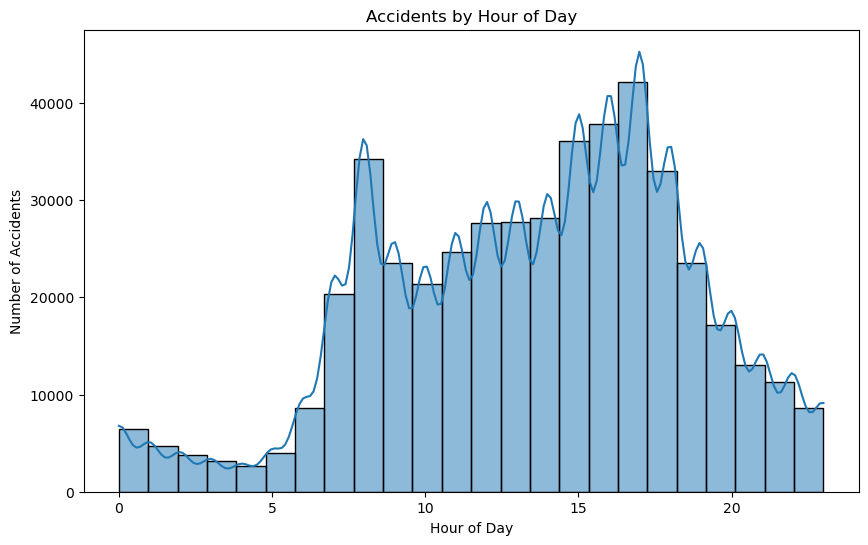

In [7]:
if 'hour' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data['hour'], bins=24, kde=True)
    plt.title('Accidents by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Accidents')
    plt.show()

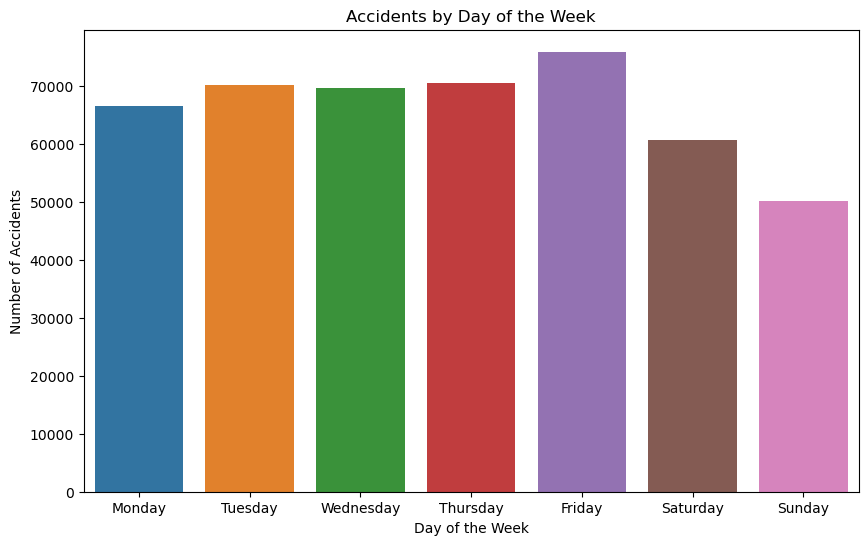

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()

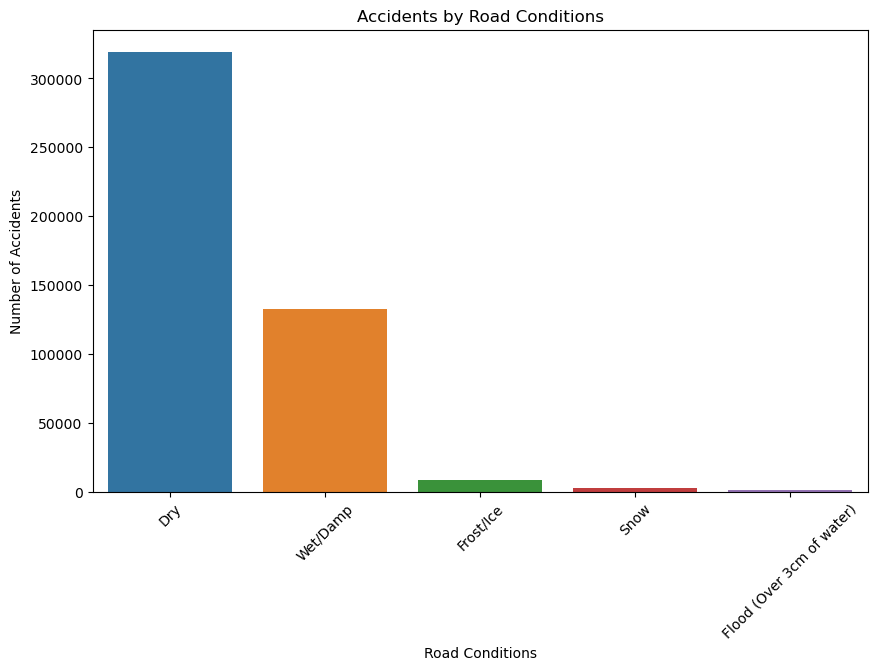

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Road_Surface_Conditions')
plt.title('Accidents by Road Conditions')
plt.xlabel('Road Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

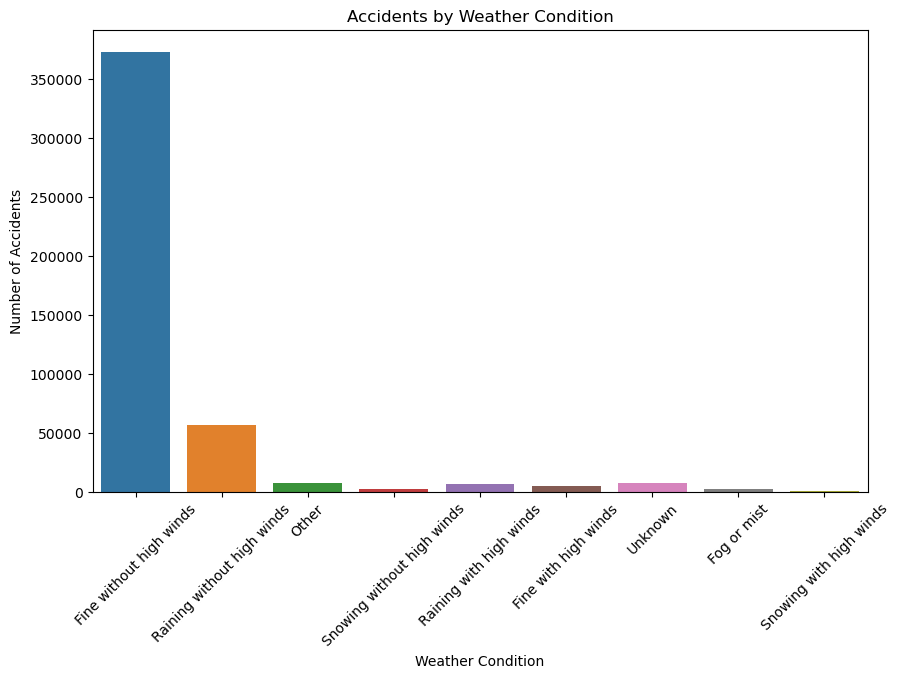

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Weather_Conditions')
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


In [11]:
accidents_map = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=12)

# Limit the number of markers to improve performance
max_markers = 1000
data_sample = data.sample(min(len(data), max_markers))  # Sample from the dataset

# Plot accident locations as circle markers on the map
for _, row in data_sample.iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
                        radius=2, color='red', fill=True).add_to(accidents_map)

# Save the map to an HTML file
accidents_map.save('accidents_map.html')

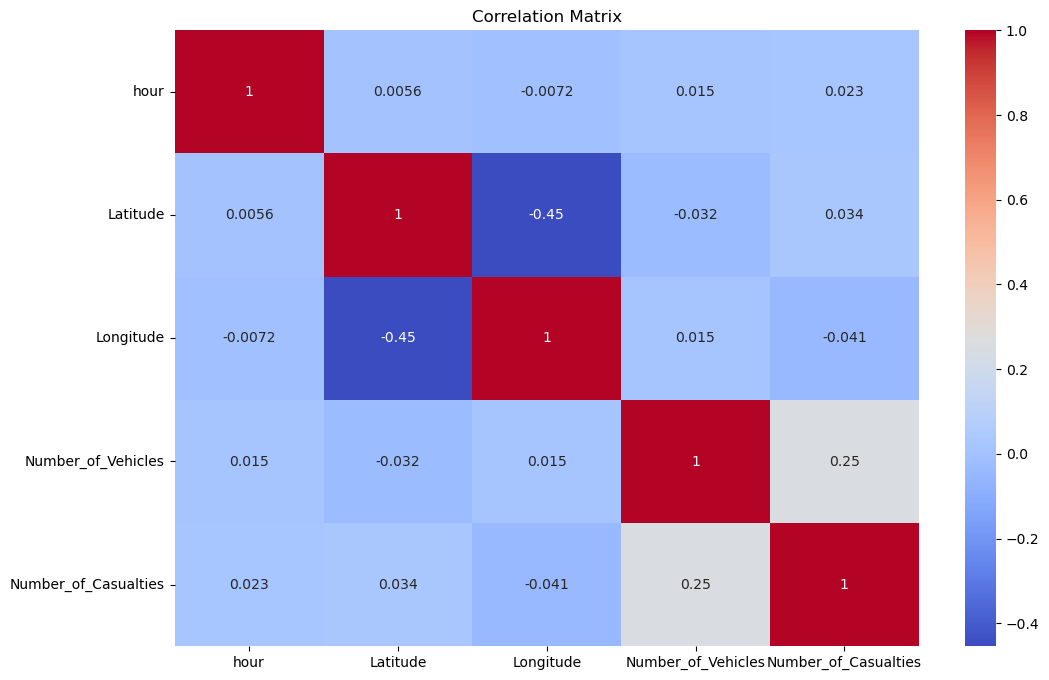

In [12]:
numerical_columns = ['hour', 'Latitude', 'Longitude', 'Number_of_Vehicles', 'Number_of_Casualties']
correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [13]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['Weather_Conditions'], data['Road_Surface_Conditions'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test p-value: {p}")


Chi-square test p-value: 0.0


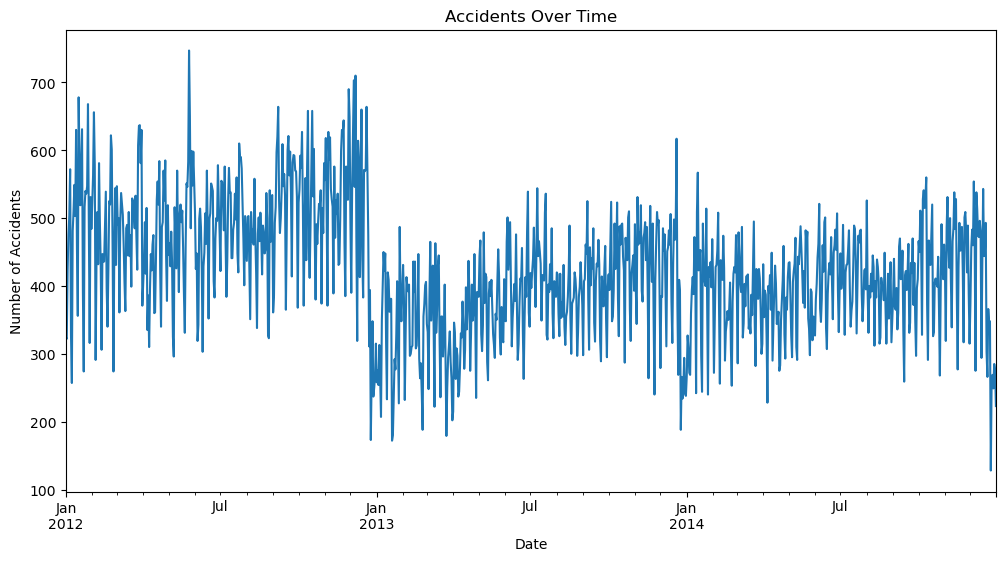

In [14]:
accidents_per_day = data.groupby(data['Date']).size()

plt.figure(figsize=(12, 6))
accidents_per_day.plot()
plt.title('Accidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.show()